In [2]:
import pandas as pd

df = pd.read_csv("/content/sales.csv", encoding="latin1")
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df.isnull().sum()


,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [5]:
df = df.dropna()


In [6]:
df = df.drop_duplicates()


In [7]:
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])


In [8]:
monthly_sales = df.groupby(df["ORDERDATE"].dt.to_period("M"))["SALES"].sum()
monthly_sales = monthly_sales.to_timestamp()
monthly_sales.head()


,SALES
ORDERDATE,
2003-04-01,50397.66
2003-05-01,9738.18
2003-07-01,28397.26
2003-09-01,47191.76
2003-11-01,41791.95


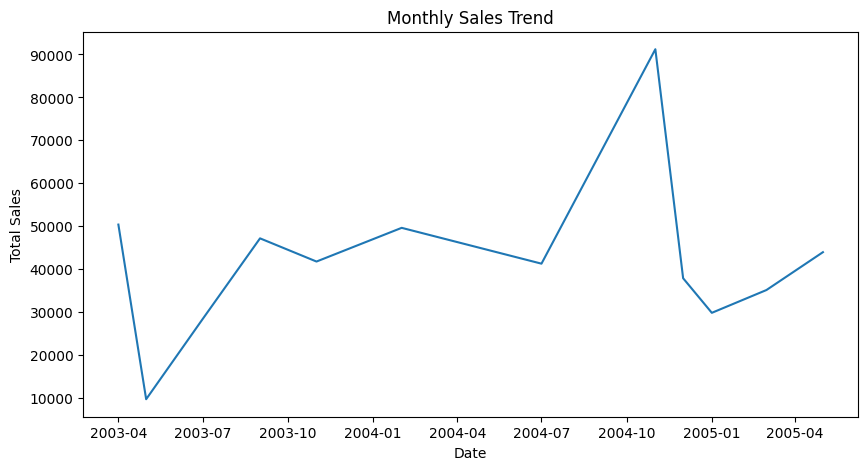

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [10]:
monthly_sales = monthly_sales.reset_index()
monthly_sales.columns = ["Date", "Sales"]
monthly_sales.head()


,Date,Sales
0,2003-04-01,50397.66
1,2003-05-01,9738.18
2,2003-07-01,28397.26
3,2003-09-01,47191.76
4,2003-11-01,41791.95


In [11]:
monthly_sales["Time"] = range(len(monthly_sales))
monthly_sales.head()


,Date,Sales,Time
0,2003-04-01,50397.66,0
1,2003-05-01,9738.18,1
2,2003-07-01,28397.26,2
3,2003-09-01,47191.76,3
4,2003-11-01,41791.95,4


In [12]:
X = monthly_sales[["Time"]]
y = monthly_sales["Sales"]


In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [15]:
monthly_sales["Predicted_Sales"] = model.predict(X)
monthly_sales.head()


,Date,Sales,Time,Predicted_Sales
0,2003-04-01,50397.66,0,37178.713718
1,2003-05-01,9738.18,1,38094.137284
2,2003-07-01,28397.26,2,39009.560851
3,2003-09-01,47191.76,3,39924.984417
4,2003-11-01,41791.95,4,40840.407984


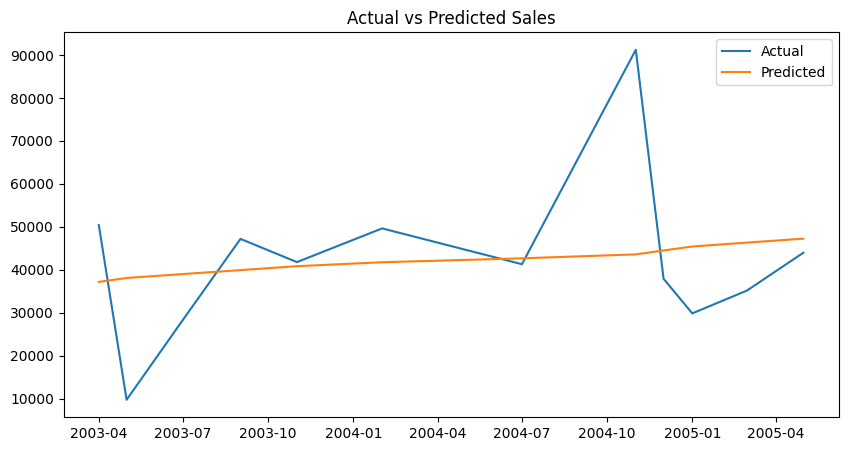

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Date"], monthly_sales["Sales"], label="Actual")
plt.plot(monthly_sales["Date"], monthly_sales["Predicted_Sales"], label="Predicted")

plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()


In [18]:
#6 months future prediction
future_time = [[i] for i in range(len(monthly_sales), len(monthly_sales)+6)]


In [19]:
future_predictions = model.predict(future_time)
future_predictions


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([48163.79651515, 49079.22008159, 49994.64364802, 50910.06721445,
       51825.49078089, 52740.91434732])

In [20]:
future_dates = pd.date_range(
    start=monthly_sales["Date"].iloc[-1] + pd.DateOffset(months=1),
    periods=6,
    freq="M"
)


/tmp/ipython-input-856790117.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


In [21]:
future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Sales": future_predictions
})

future_df


,Date,Predicted Sales
0,2005-06-30,48163.796515
1,2005-07-31,49079.220082
2,2005-08-31,49994.643648
3,2005-09-30,50910.067214
4,2005-10-31,51825.490781
5,2005-11-30,52740.914347
